# SVR = Support Vector Regression

In [38]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import random
random.seed(0)

In [39]:
data = pd.read_csv("FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data Pre-processing

In [40]:
data.drop(columns=["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "FUELCONSUMPTION_COMB_MPG"], inplace=True)
data[["FUELTYPE"]] = data[["FUELTYPE"]].replace({"X":1, "Z":2, "E":3, "D":4})
data.sort_values(by=['FUELCONSUMPTION_COMB'], inplace=True)
data.head()

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
988,1.5,4,AV,1,4.6,4.9,4.7,108
487,2.0,4,AV,1,4.7,4.9,4.8,110
987,1.8,4,AV,1,4.7,4.9,4.8,110
1042,1.4,4,AM7,2,5.6,5.2,5.4,124
415,2.0,4,AV,1,5.3,5.7,5.5,126


# SVR Model Split

In [41]:
X = data[["ENGINESIZE","FUELCONSUMPTION_COMB"]]
Y = data[["CO2EMISSIONS"]]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


# Model Init

In [42]:
from sklearn.svm import SVR

svrR = SVR()
svrL = SVR(kernel="linear")
svrP = SVR(kernel="poly",degree=1)

# Model Train

In [43]:
svrR.fit(xtrain, ytrain.values.ravel())
svrL.fit(xtrain, ytrain.values.ravel())
svrP.fit(xtrain, ytrain.values.ravel())

SVR(degree=1, kernel='poly')

# Test Model

In [44]:
yhatR = svrR.predict(xtest)
yhatL = svrL.predict(xtest)
yhatP = svrP.predict(xtest)

# Model Evaluation

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"============ RBF ==========")
print("MSE: ", mean_squared_error(yhatR, ytest.values.ravel()))
print("R2 Score: ", r2_score(yhatR, ytest.values.ravel()))
print(f"============ Linear ==========")
print("MSE: ", mean_squared_error(yhatL, ytest.values.ravel()))
print("R2 Score: ", r2_score(yhatL, ytest.values.ravel()))
print(f"============ Polynomial ==========")
print("MSE: ", mean_squared_error(yhatP, ytest.values.ravel()))
print("R2 Score: ", r2_score(yhatP, ytest.values.ravel()))


============ RBF ==========
MSE:  837.118997951699
R2 Score:  0.6628651838824833
============ Linear ==========
MSE:  1071.7965831496358
R2 Score:  0.8237906384440603
============ Polynomial ==========
MSE:  575.6075526954336
R2 Score:  0.8612970930004245


# Model Analysis & Visualization

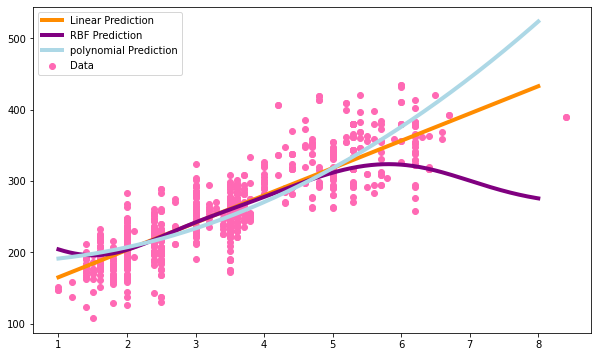

In [46]:
import matplotlib.pyplot as plt

svrR = SVR()
svrL = SVR(kernel="linear", epsilon=8)
svrP = SVR(kernel="poly",degree=2)

## Training
svrR.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())
svrL.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())
svrP.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())

## Test Prediction
yhatR = svrR.predict(xtest[["ENGINESIZE"]])
yhatL = svrL.predict(xtest[["ENGINESIZE"]])
yhatP = svrP.predict(xtest[["ENGINESIZE"]])

lineE = np.linspace(int(X[["ENGINESIZE"]].values.min()), int(X[["ENGINESIZE"]].values.max()),500).reshape(-1,1)
lineF = np.linspace(int(X[["FUELCONSUMPTION_COMB"]].values.min()), int(X[["FUELCONSUMPTION_COMB"]].values.max()),500).reshape(-1,1)

feature = pd.DataFrame(
    {
        "E": lineE[0],
        "F": lineF[0]
    },
    index=list(range(500))
)

fig, axes = plt.subplots(1,1, figsize=(10,6))
axes.scatter(xtrain[["ENGINESIZE"]].values, ytrain.values, c="hotpink", label="Data")
axes.plot(lineE, svrL.predict(lineE), c="darkorange", label="Linear Prediction", linewidth=4)
axes.plot(lineE, svrR.predict(lineE), c="purple", label="RBF Prediction", linewidth=4)
axes.plot(lineE, svrP.predict(lineE), c="lightblue", label="polynomial Prediction", linewidth=4)
axes.legend()
plt.show()

In [47]:
'''import matplotlib.pyplot as plt

svrR = SVR()
svrL = SVR(kernel="linear", epsilon=8)
svrP = SVR(kernel="poly",degree=2)

## Training
svrR.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())
svrL.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())
svrP.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())

## Test Prediction
yhatR = svrR.predict(xtest[["ENGINESIZE"]])
yhatL = svrL.predict(xtest[["ENGINESIZE"]])
yhatP = svrP.predict(xtest[["ENGINESIZE"]])

lineE = np.linspace(int(X[["ENGINESIZE"]].values.min()), int(X[["ENGINESIZE"]].values.max()),500).reshape(-1,1)
lineF = np.linspace(int(X[["FUELCONSUMPTION_COMB"]].values.min()), int(X[["FUELCONSUMPTION_COMB"]].values.max()),500).reshape(-1,1)

feature = pd.DataFrame(
    {
        "E": lineE[0],
        "F": lineF[0]
    },
    index=list(range(500))
)

fig, axes = plt.subplots(1,1, figsize=(10,6))
axes.scatter(xtrain[["ENGINESIZE"]].values, ytrain.values, c="hotpink", label="Data")
axes.plot(lineE, svrL.predict(lineE), c="darkorange", label="Linear Prediction", linewidth=4)
axes.plot(lineE, svrR.predict(lineE), c="purple", label="RBF Prediction", linewidth=4)
axes.plot(lineE, svrP.predict(lineE), c="lightblue", label="polynomial Prediction", linewidth=4)
axes.legend()
plt.show()

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_1300/4279387326.py, line 34)

# Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
svrL = SVR(kernel="linear")

grid = GridSearchCV(
    svrL,
    param_grid={
        "C": [10,20,30,40,50,60,70,80,90,100,110,120,140,160,180,200],
        "epsilon": [0.01,0.1,0.5,1.5,2.5,3.5,4,6,8,10,12,14,16,18,20,22],
        "gamma": ["auto","scale",0.1]
    },
    scoring="neg_mean_squared_error",
    refit=True,
    verbose=1,
    cv = 5
)

## Fit
grid.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())

## get best hyperparameter

grid.best_score_
grid.best_params_

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


{'C': 200, 'epsilon': 12, 'gamma': 'auto'}

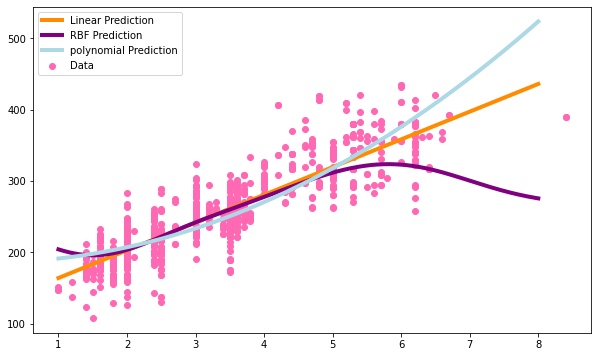

In [ ]:
import matplotlib.pyplot as plt

svrR = SVR()
svrL = SVR(kernel="linear", C=200, epsilon=12)
svrP = SVR(kernel="poly",degree=2)

## Training
svrR.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())
svrL.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())
svrP.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())

## Test Prediction
yhatR = svrR.predict(xtest[["ENGINESIZE"]])
yhatL = svrL.predict(xtest[["ENGINESIZE"]])
yhatP = svrP.predict(xtest[["ENGINESIZE"]])

lineE = np.linspace(int(X[["ENGINESIZE"]].values.min()), int(X[["ENGINESIZE"]].values.max()),500).reshape(-1,1)
lineF = np.linspace(int(X[["FUELCONSUMPTION_COMB"]].values.min()), int(X[["FUELCONSUMPTION_COMB"]].values.max()),500).reshape(-1,1)

feature = pd.DataFrame(
    {
        "E": lineE[0],
        "F": lineF[0]
    },
    index=list(range(500))
)

fig, axes = plt.subplots(1,1, figsize=(10,6))
axes.scatter(xtrain[["ENGINESIZE"]].values, ytrain.values, c="hotpink", label="Data")
axes.plot(lineE, svrL.predict(lineE), c="darkorange", label="Linear Prediction", linewidth=4)
axes.plot(lineE, svrR.predict(lineE), c="purple", label="RBF Prediction", linewidth=4)
axes.plot(lineE, svrP.predict(lineE), c="lightblue", label="polynomial Prediction", linewidth=4)
axes.legend()
plt.show()

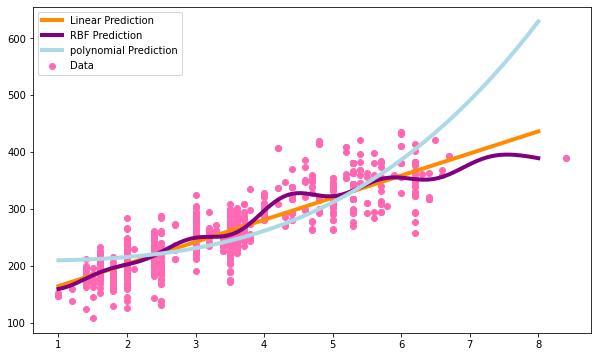

In [48]:
import matplotlib.pyplot as plt

svrR = SVR(C=200, epsilon=12, gamma="auto")
svrL = SVR(kernel="linear", C=200, epsilon=12, gamma="auto")
svrP = SVR(kernel="poly",C=200, epsilon=12, gamma="auto")

## Training
svrR.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())
svrL.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())
svrP.fit(xtrain[["ENGINESIZE"]], ytrain.values.ravel())

## Test Prediction
yhatR = svrR.predict(xtest[["ENGINESIZE"]])
yhatL = svrL.predict(xtest[["ENGINESIZE"]])
yhatP = svrP.predict(xtest[["ENGINESIZE"]])

lineE = np.linspace(int(X[["ENGINESIZE"]].values.min()), int(X[["ENGINESIZE"]].values.max()),500).reshape(-1,1)
lineF = np.linspace(int(X[["FUELCONSUMPTION_COMB"]].values.min()), int(X[["FUELCONSUMPTION_COMB"]].values.max()),500).reshape(-1,1)

feature = pd.DataFrame(
    {
        "E": lineE[0],
        "F": lineF[0]
    },
    index=list(range(500))
)

fig, axes = plt.subplots(1,1, figsize=(10,6))
axes.scatter(xtrain[["ENGINESIZE"]].values, ytrain.values, c="hotpink", label="Data")
axes.plot(lineE, svrL.predict(lineE), c="darkorange", label="Linear Prediction", linewidth=4)
axes.plot(lineE, svrR.predict(lineE), c="purple", label="RBF Prediction", linewidth=4)
axes.plot(lineE, svrP.predict(lineE), c="lightblue", label="polynomial Prediction", linewidth=4)
axes.legend()
plt.show()